# Parte IV - Modelo

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import auc, precision_recall_curve, log_loss,confusion_matrix, recall_score, precision_score
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier import DiscriminationThreshold
import warnings
from yellowbrick.classifier import DiscriminationThreshold
import evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')


C:\Users\andre.paes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\andre.paes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=mean as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [2]:
Queimadas_Pantanal = pd.read_csv('Queimadas_Pantanal_FS.csv')

In [3]:
Queimadas_Pantanal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DIAS_SEM_CHUVA                 2562 non-null   float64
 1   PRECIPITACAO_DIARIA            2562 non-null   float64
 2   PRESSAO_ATMOSFERICA            2562 non-null   float64
 3   TEMPERATURA_PONTO_DE_ORVALHO   2562 non-null   float64
 4   TEMPERATURA_MAXIMA             2562 non-null   float64
 5   TEMPERATURA_MEDIA              2562 non-null   float64
 6   TEMPERATURA_MINIMA             2562 non-null   float64
 7   UMIDADE_RELATIVA_DO_AR_MEDIA   2562 non-null   float64
 8   UMIDADE_RELATIVA_MINIMA_DO_AR  2562 non-null   float64
 9   VENTO_RAJADA_MAXIMA            2562 non-null   float64
 10  VENTO_VELOCIDADE_MEDIA         2562 non-null   float64
 11  ALERTA_FOGO                    2562 non-null   int64  
 12  MONTH                          2562 non-null   i

# Split de Dados

Fazendo seleção não estratificada

In [4]:
prop_train = []
prop_test = []
for i in range(50):
    df_train, df_test = train_test_split(Queimadas_Pantanal)
    prop_train.append(df_train['ALERTA_FOGO'].value_counts(normalize=True)[1])
    prop_test.append(df_test['ALERTA_FOGO'].value_counts(normalize=True)[1])

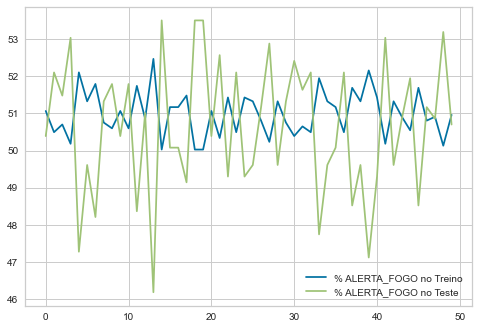

In [5]:
plt.plot(range(50), np.array(prop_train)*100, label='% ALERTA_FOGO no Treino')
plt.plot(range(50), np.array(prop_test)*100, label = '% ALERTA_FOGO no Teste')
plt.legend()
plt.show()

Fazendo seleção estratificada

In [6]:
prop_train = []
prop_test = []
for i in range(50):
    df_train, df_test = train_test_split(Queimadas_Pantanal,
                                        stratify=Queimadas_Pantanal['ALERTA_FOGO'])
    prop_train.append(df_train['ALERTA_FOGO'].value_counts(normalize=True)[1])
    prop_test.append(df_test['ALERTA_FOGO'].value_counts(normalize=True)[1])

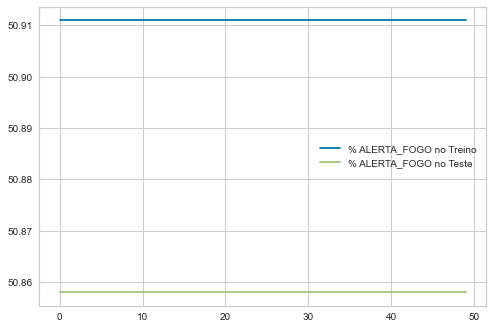

In [7]:
plt.plot(range(50), np.array(prop_train)*100, label='% ALERTA_FOGO no Treino')
plt.plot(range(50), np.array(prop_test)*100, label = '% ALERTA_FOGO no Teste')
plt.legend()
plt.show()

In [8]:
X_train = df_train.drop('ALERTA_FOGO', axis=1)

In [9]:
y_train = df_train['ALERTA_FOGO']

In [10]:
X_test = df_test.drop('ALERTA_FOGO', axis=1)

In [11]:
y_test = df_test['ALERTA_FOGO']

In [7]:
# X_train, y_train = df_train.drop('ALERTA_FOGO', axis=1), df_train['ALERTA_FOGO']
# X_test, y_test = df_test.drop('ALERTA_FOGO', axis=1), df_test['ALERTA_FOGO']

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 977 to 1213
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DIAS_SEM_CHUVA                 1921 non-null   float64
 1   PRECIPITACAO_DIARIA            1921 non-null   float64
 2   PRESSAO_ATMOSFERICA            1921 non-null   float64
 3   TEMPERATURA_PONTO_DE_ORVALHO   1921 non-null   float64
 4   TEMPERATURA_MAXIMA             1921 non-null   float64
 5   TEMPERATURA_MEDIA              1921 non-null   float64
 6   TEMPERATURA_MINIMA             1921 non-null   float64
 7   UMIDADE_RELATIVA_DO_AR_MEDIA   1921 non-null   float64
 8   UMIDADE_RELATIVA_MINIMA_DO_AR  1921 non-null   float64
 9   VENTO_RAJADA_MAXIMA            1921 non-null   float64
 10  VENTO_VELOCIDADE_MEDIA         1921 non-null   float64
 11  MONTH                          1921 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 195.1 K

# Aplicando MinMaxScaler

In [13]:
num_columns_ALERTA_FOGO = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [14]:
pipe_num_columns_ALERTA_FOGO = ('min_max_scaler',
                          MinMaxScaler(), 
                          num_columns_ALERTA_FOGO)

In [15]:
transformers = [pipe_num_columns_ALERTA_FOGO]
pre_processor = ColumnTransformer(transformers)

# Modelagem

## Seleção de Modelos

In [16]:
model_reglog = Pipeline(steps=[('pre_processor', pre_processor), 
                               ('model', LogisticRegression(max_iter=5000, 
                                                            random_state=123))])
model_svm = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', SVC(kernel='rbf', probability=True, random_state=123))])
model_knn = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', KNeighborsClassifier())])
model_dt = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', DecisionTreeClassifier(max_depth=5,random_state=123))])
model_rf = Pipeline(steps=[('pre_processor', pre_processor),
                            ('model', RandomForestClassifier(max_depth=5,random_state=123))])

In [17]:
classifiers = [model_reglog, model_svm, model_knn, model_dt, model_rf]

In [18]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    print(type(classifier['model']).__name__,'\n')
    print(f'log_loss treino: {log_loss(y_train, classifier.predict_proba(X_train))}')
    print(f'log_loss teste: {log_loss(y_test, classifier.predict_proba(X_test))}')
    print(100*'-')

LogisticRegression 

log_loss treino: 0.538333076850797
log_loss teste: 0.5435367804246181
----------------------------------------------------------------------------------------------------
SVC 

log_loss treino: 0.473855915814536
log_loss teste: 0.4742207508164932
----------------------------------------------------------------------------------------------------
KNeighborsClassifier 

log_loss treino: 0.21009790468648157
log_loss teste: 1.0666691431230877
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier 

log_loss treino: 0.3510701116818457
log_loss teste: 0.5283286784768124
----------------------------------------------------------------------------------------------------
RandomForestClassifier 

log_loss treino: 0.3768419552199161
log_loss teste: 0.40506010025146494
----------------------------------------------------------------------------------------------------


In [101]:
# y_pred_test = classifier.predict_proba(X_test)

In [ ]:
# Nesse caso observamos que o RandomForestClassifier se apresentou com melhores métricas de Log_Loss.

# Avaliação do Threshold

In [19]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['DIAS_SEM_CHUVA',
                                                   'PRECIPITACAO_DIARIA',
                                                   'PRESSAO_ATMOSFERICA',
                                                   'TEMPERATURA_PONTO_DE_ORVALHO',
                                                   'TEMPERATURA_MAXIMA',
                                                   'TEMPERATURA_MEDIA',
                                                   'TEMPERATURA_MINIMA',
                                                   'UMIDADE_RELATIVA_DO_AR_MEDIA',
                                                   'UMIDADE_RELATIVA_MINIMA_DO_AR',
                                                   'VENTO_RAJADA_MAXIMA',
                                                   'VENTO_VELOCIDADE_MEDI

## Avalie as métricas em relação ao threshold escolhido

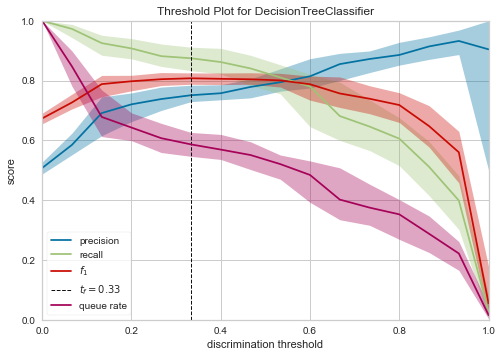

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [20]:
visualizer = DiscriminationThreshold(model_dt, cv=0.3)

visualizer.fit(X_train, y_train)       
visualizer.show() 

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
y_pred_gini = clf_gini.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7691


In [25]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7579


In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7579
Test set score: 0.7691


[Text(334.8, 380.52, 'X[0] <= 5.5\ngini = 0.5\nsamples = 1921\nvalue = [943, 978]'),
 Text(167.4, 271.8, 'X[11] <= 4.5\ngini = 0.457\nsamples = 1314\nvalue = [849, 465]'),
 Text(83.7, 163.07999999999998, 'X[5] <= 26.125\ngini = 0.29\nsamples = 511\nvalue = [421, 90]'),
 Text(41.85, 54.360000000000014, 'gini = 0.079\nsamples = 219\nvalue = [210, 9]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.401\nsamples = 292\nvalue = [211, 81]'),
 Text(251.10000000000002, 163.07999999999998, 'X[11] <= 10.5\ngini = 0.498\nsamples = 803\nvalue = [428, 375]'),
 Text(209.25, 54.360000000000014, 'gini = 0.488\nsamples = 516\nvalue = [218, 298]'),
 Text(292.95, 54.360000000000014, 'gini = 0.393\nsamples = 287\nvalue = [210, 77]'),
 Text(502.20000000000005, 271.8, 'X[11] <= 5.5\ngini = 0.262\nsamples = 607\nvalue = [94, 513]'),
 Text(418.5, 163.07999999999998, 'X[8] <= 40.5\ngini = 0.464\nsamples = 150\nvalue = [55, 95]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.248\nsamples = 

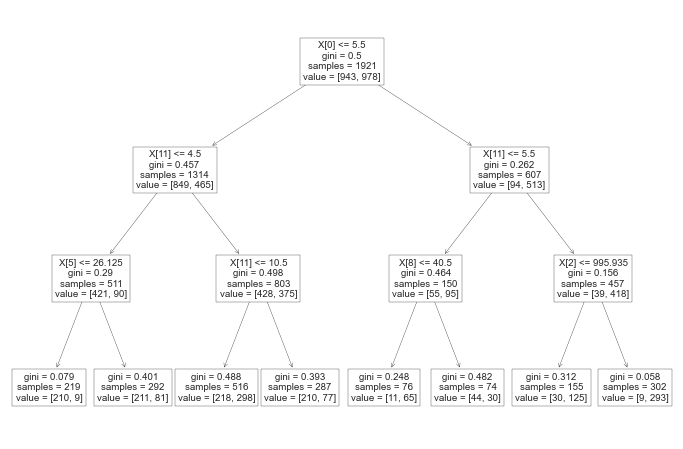

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [30]:
import graphviz 

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 977 to 1213
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DIAS_SEM_CHUVA                 1921 non-null   float64
 1   PRECIPITACAO_DIARIA            1921 non-null   float64
 2   PRESSAO_ATMOSFERICA            1921 non-null   float64
 3   TEMPERATURA_PONTO_DE_ORVALHO   1921 non-null   float64
 4   TEMPERATURA_MAXIMA             1921 non-null   float64
 5   TEMPERATURA_MEDIA              1921 non-null   float64
 6   TEMPERATURA_MINIMA             1921 non-null   float64
 7   UMIDADE_RELATIVA_DO_AR_MEDIA   1921 non-null   float64
 8   UMIDADE_RELATIVA_MINIMA_DO_AR  1921 non-null   float64
 9   VENTO_RAJADA_MAXIMA            1921 non-null   float64
 10  VENTO_VELOCIDADE_MEDIA         1921 non-null   float64
 11  MONTH                          1921 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 195.1 K

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz\bin'


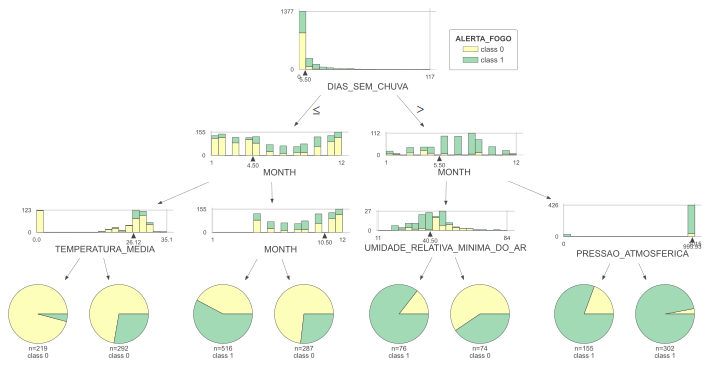

In [48]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf_gini, X_train, y_train,
                target_name="ALERTA_FOGO",
                feature_names=X_train.columns)
viz

In [35]:
viz.save("decision_tree.svg")

In [34]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [36]:
X = X_train
y = y_train

In [37]:
text_representation = tree.export_text(clf_gini)
print(text_representation)

|--- feature_0 <= 5.50
|   |--- feature_11 <= 4.50
|   |   |--- feature_5 <= 26.12
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.12
|   |   |   |--- class: 0
|   |--- feature_11 >  4.50
|   |   |--- feature_11 <= 10.50
|   |   |   |--- class: 1
|   |   |--- feature_11 >  10.50
|   |   |   |--- class: 0
|--- feature_0 >  5.50
|   |--- feature_11 <= 5.50
|   |   |--- feature_8 <= 40.50
|   |   |   |--- class: 1
|   |   |--- feature_8 >  40.50
|   |   |   |--- class: 0
|   |--- feature_11 >  5.50
|   |   |--- feature_2 <= 995.93
|   |   |   |--- class: 1
|   |   |--- feature_2 >  995.93
|   |   |   |--- class: 1



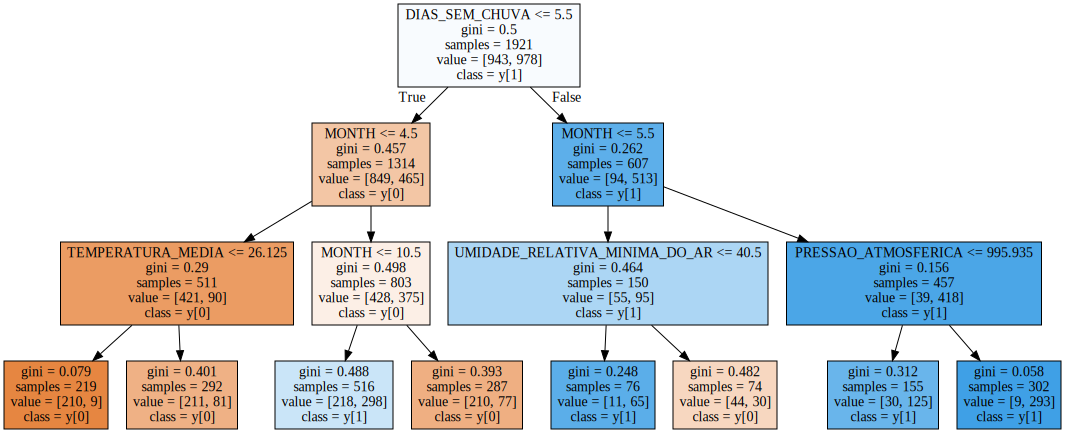

In [68]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=True,
                                filled=True)
graphviz.Source(dot_data, format="png") 

### Feature Importance

<BarContainer object of 12 artists>

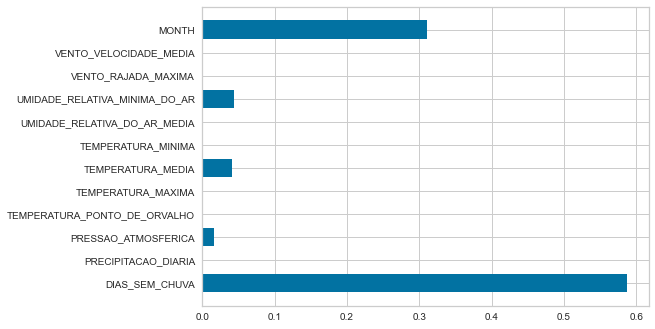

In [70]:
plt.barh(X_train.columns, clf_gini.feature_importances_)

In [71]:
clf_gini.feature_importances_

array([0.58763468, 0.        , 0.01610644, 0.        , 0.        ,
       0.04097969, 0.        , 0.        , 0.0444974 , 0.        ,
       0.        , 0.31078179])

### Confusion Matrix

In [72]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[242  73]
 [ 75 251]]


### Classification Report

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       315
           1       0.77      0.77      0.77       326

    accuracy                           0.77       641
   macro avg       0.77      0.77      0.77       641
weighted avg       0.77      0.77      0.77       641

